# First, the positions and velocities of the Sun, Venus, Earth + Moon, Mars, Jupiter, Saturn, Uranus and Neptune (NASA):


In [1]:
import find_minimum as fm


def initValues():
    tau = 0.1
    n = 8

    r = [[-7.673580434738827E-03, -3.302239590214931E-03, 2.073556671274906E-04],  #sun
         [1.031676785783527E-01, -7.220322696819025E-01, -1.605894448118791E-02],  # venus
         [-9.294540095336091E-01, 3.588445258850390E-01, 1.926442025006808E-04],  # earth-moon
         [5.264017802512928E-01, -1.313398546392095E+00, -4.034877264297493E-02],  # mars
         [3.154370180372728E+00, 3.864716240001179E+00, -8.660527552121619E-02],  #jupiter
         [9.088876584475846E+00, -3.418750561111714E+00, -3.024294560812625E-01],  # saturn
         [1.208255233017465E+01, 1.542842684156150E+01, -9.923051456469745E-02],  # uranus
         [2.984417890933288E+01, -1.610959943305994E+00, -6.546153144468648E-01]]  # neptune

    v = [[5.284080958425666E-06, -6.612725729575814E-06, -5.777615059407366E-08],
         [1.986026764570113E-02, 3.004963198838360E-03, -1.104347674861390E-03],
         [-6.565481304470507E-03, -1.608426127405946E-02, 8.746841462728153E-07],
         [1.349105484863411E-02, 6.476293787108244E-03, -1.949823946560652E-04],
         [-5.930059281641269E-03, 5.129465695997253E-03, 1.113836617945254E-04],
         [1.652049152295692E-03, 5.210742926395387E-03, -1.563838771029767E-04],
         [-3.125557845008292E-03, 2.241772469446605E-03, 4.888926089216552E-05],
         [1.483942065827750E-04, 3.153110157781661E-03, -6.837595187070281E-05]]

    m = [1,
         48.685e23 / 1988500e24,  # venus
         (5.97219e24 + 7.349e22) / 1988500e24,  # earth + moon
         6.4171e23 / 1988500e24,  # mars
         189818722E19 / 1988500e24,  # jupiter
         5.6834e26 / 1988500e24,  # saturn
         86.813e24 / 1988500e24,  # uranus
         102.409e24 / 1988500e24]  # neptune

    return tau, n, m, r, v


## With synthetic data

2024-04-10 15:55:10.772113: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: StatefulPartitionedCall/map/while/body/_320/map/while/cond/else/_2322/map/while/cond/StatefulPartitionedCall/StatefulPartitionedCall/while_223/body/_3538/while/cond/then/_5401/while/cond/StatefulPartitionedCall/cond_188/else/_6392/cond/cond/else/_7383/cond/cond/cond/branch_executed/_8906


The learned values for each epoch are:  [array([1.05      , 2.        , 1.25      , 0.3       , 4.2       ,
       1.14995005, 4.2       , 2.2       ]), array([0.85      , 1.8       , 1.2       , 0.1       , 4.4       ,
       1.34995005, 4.4       , 2.4       ]), array([ 0.45      ,  1.4       ,  1.15      , -0.3       ,  4.8       ,
        1.74995005,  4.8       ,  2.8       ]), array([-0.35      ,  0.6       ,  1.050001  , -1.1       ,  5.6       ,
        2.54995005,  5.6       ,  3.6       ]), array([ 0.05      , -1.        ,  0.850005  , -0.7       ,  7.2       ,
        4.14995005,  7.2       ,  5.2       ]), array([ 0.45      , -0.2       ,  0.450017  , -0.3       ,  6.4       ,
        7.34995005,  6.4       ,  8.4       ]), array([ 1.249992  ,  0.6       , -0.349951  ,  0.499992  ,  5.6       ,
       13.74995005,  5.6       , 14.8       ]), array([ 0.849996  ,  0.2       ,  0.050033  ,  0.099996  ,  4.000016  ,
       10.54995005,  4.000016  , 11.6       ]), array([ 1.04999

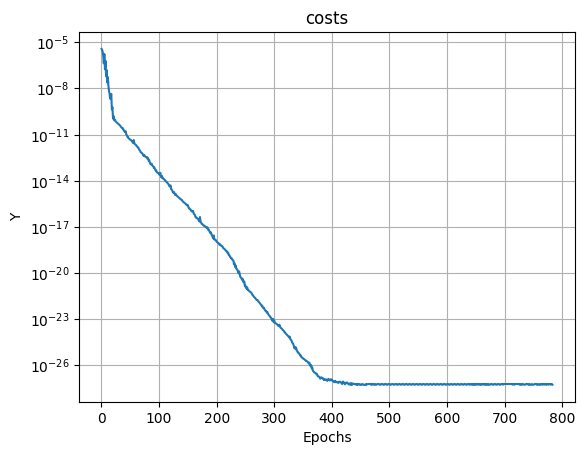

In [2]:
tau, n, m, r, v = initValues()
values, costs, _ = fm.learn_all_masses_Simulated_Values(
    tau, n, m, r, v,
    learning_rate=1E-1,
    starting_guess=[1.15, 2.1, 1.15, 0.4, 4.1, 1.04995005,
                      4.1, 2.1], # Some random values. The algorithm seems to have difficulties for really large random values as it seems as though there are multiple local minima. Contrary to the premise, I had. But I didn't put in the time to varify this, as it takes like 15 minutes to learn accurately per try. That it works with reasonable guesses was fine by me. Eg, no one would guess, the earth is 1000 times the mass of the sun.
    num_of_steps_in_do_step=10,
    accuracy=1E-18,
    convergence_rate=1.00001,
    learning_rate_factor=2
)

print("The learned values for each epoch are: ", values)
print("The values should be: ", 1,
      48.685e23 / 1988500e24,  # venus
      (5.97219e24 + 7.349e22) / 1988500e24,  # earth + moon
      6.4171e23 / 1988500e24,  # mars
      189818722E19 / 1988500e24,  # jupiter
      5.6834e26 / 1988500e24,  # saturn
      86.813e24 / 1988500e24,  # uranus
      102.409e24 / 1988500e24)  # neptune

import numpy as np

print("differences: ", np.abs(np.array(values[-1]) - np.array(
    [1, 2.448327885340709e-06, 3.040321850641187e-06, 3.2271058586874533e-07, 0.0009545824591400553,
     0.00028581342720643705,
     4.365753080211214e-05, 5.150062861453357e-05])), "\n")

fm.plot(costs, "costs")

## Now, the reals data after one day is used in the cost function

The learned values for each epoch are:  [array([ 3.        ,  2.00000245,  2.00000304,  2.00000032, -1.99904542,
        2.00028581, -1.99995634,  2.0000515 ]), array([ 2.        ,  1.00000245,  1.00000304,  1.00000032, -5.99904542,
        6.00028581, -0.99995634,  6.0000515 ]), array([ 1.00000000e+00,  2.44832789e-06,  3.04032185e-06,  3.22710586e-07,
       -3.99904542e+00,  1.40002858e+01,  4.36575308e-05,  1.40000515e+01]), array([ 1.5       , -1.99997755,  0.50000304, -1.99997968, -1.99904542,
       10.00028581,  2.00002366, 10.0000515 ]), array([ 1.25      , -0.99998755,  0.25000304, -0.99998968, -2.99904542,
       12.00028581,  1.00003366, 12.0000515 ]), array([ 1.00000000e+00,  2.44832789e-06,  3.04032185e-06,  3.22710586e-07,
       -3.99904542e+00,  1.40002858e+01,  4.36575308e-05,  1.40000515e+01]), array([ 1.125     , -0.49999255,  0.12500304, -0.49999468, -3.49904542,
       13.00028581,  0.50003866, 13.0000515 ]), array([ 1.0625    , -0.24999505,  0.06250304, -0.249997

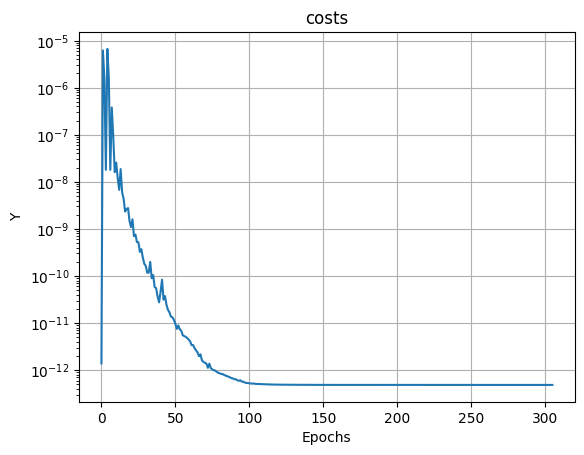

In [4]:
r1 = [[-7.668292490862695E-03, -3.308848670945613E-03, 2.072977430167829E-04],  # sun
      [1.229828037999395E-01, -7.187514452301442E-01, -1.715689882307804E-02],  # venus
      [-9.358787893896839E-01, 3.427059377322474E-01, 1.935209878663324E-04],  # earth-moon
      [5.398647146263628E-01, -1.306853952358735E+00, -4.054163395824471E-02],  # mars
      [3.148436290823115E+00, 3.869840604270508E+00, -8.649380944161839E-02],  # jupiter
      [9.090527183729291E+00, -3.413539422101748E+00, -3.025857128681040E-01],  # saturn
      [1.207942658341018E+01, 1.543066830062747E+01, -9.918161542644022E-02],  # uranus
      [2.984432715520231E+01, -1.607806805652261E+00, -6.546836840089330E-01]]  # neptune

v1 = [[5.291812830223108E-06, -6.605432136018599E-06, -5.807238687882910E-08],  # sun
      [1.976744941496291E-02, 3.556236893790846E-03, -1.091420994166534E-03],  # venus
      [-6.283785916697321E-03, -1.619208331801496E-02, 8.788386684387692E-07],
      [1.343456159546321E-02, 6.612823743781002E-03, -1.907355280556772E-04],
      [-5.937068039285455E-03, 5.119426521927845E-03, 1.115635252988602E-04],
      [1.649176828800679E-03, 5.211549155998432E-03, -1.561397786601397E-04],
      [-3.125964300236726E-03, 2.241148205905351E-03, 4.888263136269243E-05],
      [1.480972006679988E-04, 3.153165304146982E-03, -6.836275412792906E-05]]

tau, n, _, r, v = initValues()
values, costs, _ = fm.learn_all_masses(
    tau, n, r, v, r1, v1,
    start_value_learning_rate=1,
    startingPosition=[1, 2.448327885340709e-06, 3.040321850641187e-06, 3.2271058586874533e-07, 0.0009545824591400553,
                      0.00028581342720643705, 4.365753080211214e-05, 5.150062861453357e-05], # These are the real values. It should therefore stay close to those values, but it doesn't
    num_of_steps_in_do_step=10,
    accuracy=1E-7,
    convergence_rate=1.00001
)
print("The learned values for each epoch are: ", values)
fm.plot(costs, "costs")

In [5]:
print("The values should be: ", 1,
      48.685e23 / 1988500e24,  # venus
      (5.97219e24 + 7.349e22) / 1988500e24,  # earth + moon
      6.4171e23 / 1988500e24,  # mars
      189818722E19 / 1988500e24,  # jupiter
      5.6834e26 / 1988500e24,  # saturn
      86.813e24 / 1988500e24,  # uranus
      102.409e24 / 1988500e24)  # neptune)

The values should be:  1 2.448327885340709e-06 3.040321850641187e-06 3.2271058586874533e-07 0.0009545824591400553 0.00028581342720643705 4.365753080211214e-05 5.150062861453357e-05


# To see, why the learning algorithm with real data failed, it is helpful to see the difference between the prediction of the n-body simulator for a day and the real values

In [6]:
tau = 0.1
n = 8
r0 = [[-7.673580434738827E-03, -3.302239590214931E-03, 2.073556671274906E-04],  # sun
      [1.031676785783527E-01, -7.220322696819025E-01, -1.605894448118791E-02],  # venus
      [-9.294540095336091E-01, 3.588445258850390E-01, 1.926442025006808E-04],  # earth-moon
      [5.264017802512928E-01, -1.313398546392095E+00, -4.034877264297493E-02],  # mars
      [3.154370180372728E+00, 3.864716240001179E+00, -8.660527552121619E-02],  # jupiter
      [9.088876584475846E+00, -3.418750561111714E+00, -3.024294560812625E-01],  # saturn
      [1.208255233017465E+01, 1.542842684156150E+01, -9.923051456469745E-02],  # uranus
      [2.984417890933288E+01, -1.610959943305994E+00, -6.546153144468648E-01]]  # neptune

v0 = [[5.284080958425666E-06, -6.612725729575814E-06, -5.777615059407366E-08],
      [1.986026764570113E-02, 3.004963198838360E-03, -1.104347674861390E-03],
      [-6.565481304470507E-03, -1.608426127405946E-02, 8.746841462728153E-07],
      [1.349105484863411E-02, 6.476293787108244E-03, -1.949823946560652E-04],
      [-5.930059281641269E-03, 5.129465695997253E-03, 1.113836617945254E-04],
      [1.652049152295692E-03, 5.210742926395387E-03, -1.563838771029767E-04],
      [-3.125557845008292E-03, 2.241772469446605E-03, 4.888926089216552E-05],
      [1.483942065827750E-04, 3.153110157781661E-03, -6.837595187070281E-05]]

r1 = [[-7.668292490862695E-03, -3.308848670945613E-03, 2.072977430167829E-04],  # sun
      [1.229828037999395E-01, -7.187514452301442E-01, -1.715689882307804E-02],  # venus
      [-9.358787893896839E-01, 3.427059377322474E-01, 1.935209878663324E-04],  # earth-moon
      [5.398647146263628E-01, -1.306853952358735E+00, -4.054163395824471E-02],  # mars
      [3.148436290823115E+00, 3.869840604270508E+00, -8.649380944161839E-02],  # jupiter
      [9.090527183729291E+00, -3.413539422101748E+00, -3.025857128681040E-01],  # saturn
      [1.207942658341018E+01, 1.543066830062747E+01, -9.918161542644022E-02],  # uranus
      [2.984432715520231E+01, -1.607806805652261E+00, -6.546836840089330E-01]]  # neptune

v1 = [[5.291812830223108E-06, -6.605432136018599E-06, -5.807238687882910E-08],  # sun
      [1.976744941496291E-02, 3.556236893790846E-03, -1.091420994166534E-03],  # venus
      [-6.283785916697321E-03, -1.619208331801496E-02, 8.788386684387692E-07],
      [1.343456159546321E-02, 6.612823743781002E-03, -1.907355280556772E-04],
      [-5.937068039285455E-03, 5.119426521927845E-03, 1.115635252988602E-04],
      [1.649176828800679E-03, 5.211549155998432E-03, -1.561397786601397E-04],
      [-3.125964300236726E-03, 2.241148205905351E-03, 4.888263136269243E-05],
      [1.480972006679988E-04, 3.153165304146982E-03, -6.836275412792906E-05]]

m = [1,
     48.685e23 / 1988500e24,  # venus
     (5.97219e24 + 7.349e22) / 1988500e24,  # earth + moon
     6.4171e23 / 1988500e24,  # mars
     189818722E19 / 1988500e24,  # jupiter
     5.6834e26 / 1988500e24,  # saturn
     86.813e24 / 1988500e24,  # uranus
     102.409e24 / 1988500e24]  # neptune

x, y = fm.execute_x_times_do_step_normal(tau, n, m, r0, v0, 10)
print(f"r1: {r1}", f"r1: {x}", sep="\n")
print(f"v1:{v1}", f"v1:{y}", sep="\n")
import numpy as np

print("differences: ", np.abs(np.array(r1) - np.array(x)), "\n",
      np.abs(np.array(v1) - np.array(y)))  # The differences don't get smaller with smapper tau

r1: [[-0.007668292490862695, -0.003308848670945613, 0.0002072977430167829], [0.1229828037999395, -0.7187514452301442, -0.01715689882307804], [-0.9358787893896839, 0.3427059377322474, 0.0001935209878663324], [0.5398647146263628, -1.306853952358735, -0.04054163395824471], [3.148436290823115, 3.869840604270508, -0.08649380944161839], [9.090527183729291, -3.413539422101748, -0.302585712868104], [12.07942658341018, 15.43066830062747, -0.09918161542644022], [29.84432715520231, -1.607806805652261, -0.654683684008933]]
r1: [[-0.00766829264705297, -0.0033088486119253174, 0.00020729776219619478], [0.12298280443464081, -0.7187514493158444, -0.01715689891369572], [-0.9358787914640497, 0.3427059385535368, 0.00019352098847867684], [0.5398647150520621, -1.3068539533623427, -0.04054163399420527], [3.148436373936735, 3.869841116281109, -0.086493788964714], [9.09052716753366, -3.4135392671435274, -0.30258579117314705], [12.079426534512566, 15.43066831032577, -0.09918162335234551], [29.84432713805678, -1